# Friendships within a Distributed Group (2019)

## Packages & Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pagerank import powerIteration

## Importing Data

### How well do you know this person?

In [2]:
data_2019_know = pd.read_csv("data/2019_know.csv", index_col=0)
data_2019_know

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,1.0,4.0,4.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,3.0,2.0
Emma,2.0,NaN,3.0,2.0,2.0,3.0,3.0,1.0,2.0,3.0,1.0,3.0,1.0,5.0
Gabby,3.0,3.0,NaN,5.0,3.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0
Cam,4.0,3.0,5.0,NaN,5.0,5.0,3.0,5.0,4.0,5.0,3.0,4.0,4.0,5.0
Andrew,3.0,3.0,3.0,5.0,NaN,5.0,2.0,2.0,4.0,4.0,3.0,4.0,3.0,5.0
Isaac,2.0,2.0,5.0,5.0,5.0,NaN,2.0,1.0,4.0,4.0,1.0,2.0,1.0,5.0
Alex,3.0,4.0,5.0,5.0,2.0,3.0,NaN,5.0,2.0,2.0,2.0,3.0,3.0,3.0
Arielle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liam,4.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,NaN,4.0,3.0,4.0,3.0,4.0
James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How much do you like this person?

In [3]:
data_2019_like = pd.read_csv("data/2019_like.csv", index_col=0)
data_2019_like

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,4.0,5.0,2.0,2.0,2.0,4.0,5.0,3.0,4.0,4.0,5.0,3.0,2.0
Emma,4.0,NaN,3.0,3.0,3.0,3.0,5.0,4.0,3.0,4.0,3.0,5.0,3.0,5.0
Gabby,5.0,5.0,NaN,5.0,5.0,4.0,5.0,4.0,3.0,5.0,4.0,3.0,5.0,2.0
Cam,4.0,4.0,5.0,NaN,4.0,4.0,4.0,5.0,5.0,5.0,4.0,3.0,5.0,3.0
Andrew,3.0,3.0,3.0,5.0,NaN,5.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,5.0
Isaac,3.0,4.0,5.0,5.0,5.0,NaN,3.0,2.0,4.0,5.0,2.0,1.0,3.0,5.0
Alex,4.0,4.0,5.0,5.0,2.0,4.0,NaN,5.0,2.0,3.0,2.0,3.0,3.0,1.0
Arielle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liam,4.0,5.0,3.0,4.0,4.0,4.0,3.0,5.0,NaN,4.0,4.0,4.0,5.0,4.0
James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

In [4]:
data_2019_contact = pd.read_csv("data/2019_contact.csv", index_col=0)
data_2019_contact

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Emma,2.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0
Gabby,1.0,1.0,NaN,4.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
Cam,2.0,1.0,4.0,NaN,3.0,4.0,2.0,2.0,4.0,3.0,2.0,2.0,3.0,1.0
Andrew,1.0,1.0,1.0,3.0,NaN,5.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,3.0
Isaac,1.0,1.0,2.0,5.0,5.0,NaN,1.0,1.0,3.0,2.0,1.0,1.0,1.0,5.0
Alex,1.0,1.0,3.0,2.0,1.0,1.0,NaN,5.0,1.0,1.0,1.0,1.0,1.0,1.0
Arielle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liam,2.0,1.0,2.0,3.0,3.0,3.0,2.0,1.0,NaN,2.0,2.0,2.0,1.0,2.0
James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How much do you trust this person?

In [5]:
data_2019_trust = pd.read_csv("data/2019_trust.csv", index_col=0)
data_2019_trust

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,4.0,4.0,3.0,1.0,1.0,4.0,5.0,2.0,4.0,2.0,4.0,3.0,1.0
Emma,2.0,NaN,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,5.0
Gabby,3.0,3.0,NaN,5.0,3.0,4.0,5.0,3.0,3.0,4.0,3.0,3.0,3.0,2.0
Cam,3.0,2.0,5.0,NaN,3.0,3.0,2.0,5.0,4.0,4.0,2.0,2.0,4.0,2.0
Andrew,3.0,3.0,3.0,4.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0
Isaac,3.0,4.0,5.0,5.0,5.0,NaN,3.0,2.0,4.0,4.0,1.0,1.0,1.0,5.0
Alex,3.0,4.0,5.0,3.0,1.0,2.0,NaN,5.0,1.0,1.0,1.0,2.0,3.0,1.0
Arielle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liam,3.0,5.0,3.0,3.0,4.0,3.0,4.0,5.0,NaN,4.0,3.0,4.0,4.0,4.0
James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How likely are you to go to this person for advice or emotional support?

In [6]:
data_2019_support = pd.read_csv("data/2019_support.csv", index_col=0)
data_2019_support

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Emma,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,4.0
Gabby,2.0,2.0,NaN,5.0,1.0,3.0,5.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0
Cam,3.0,1.0,5.0,NaN,3.0,4.0,1.0,5.0,3.0,4.0,2.0,1.0,3.0,1.0
Andrew,1.0,1.0,1.0,2.0,NaN,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
Isaac,1.0,1.0,3.0,5.0,5.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0
Alex,3.0,3.0,5.0,3.0,1.0,1.0,NaN,5.0,1.0,1.0,1.0,1.0,1.0,1.0
Arielle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liam,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
James,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### General Data / Demographics

In [7]:
data_2019_demographics = pd.read_csv("data/2019_demographics.csv", index_col=0)
data_2019_demographics

,lname,gender,ethnicity,city,state,college,zip code,major,cookie
fname,,,,,,,,,
Steph,Ananth,Female,Asian,Pittsburgh,PA,Carnegie Mellon University,15289.0,Information Systems,Chocolate Chip
Gabby,Bodet,Female,Black or African American,Atlanta,GA,Emory University,30322.0,"Theater Studies Major, Film Studies Minor",Chocolate Chip
Ziqian,Zhang,Female,Asian,Boston,MA,Boston University,2215.0,Business Administration,Orange Cranberry
Alex,Minasian,Female,White,Wenham,MA,Gordon College,1984.0,Kinesiology,Chocolate Chip
Emma,Bergstrom,Female,White,Wheaton,IL,Wheaton College,60187.0,Biology,Chocolate Chip
Cam,Hudson,Male,White,Rochester,NY,Rochester Institute of Technology,14623.0,Computer Engineering,Chocolate Chip & Butterscotch
Isaac,McGonagle,Male,White,Pittsburgh,PA,University of Pittsburgh,15213.0,Electrical Engineering,Peanut Butter Chocolate Chip
Liam,O'Toole,Male,White,"Washington, D.C.",DC,The Catholic University of America,20064.0,Theology,Molasses Ginger
Michelle,Zhou,Female,Asian,Chestnut Hill,MA,Boston College,2467.0,Theology and Applied Psychology/Human Development,Snickerdoodle


In [8]:
people = list(data_2019_demographics.sort_values(by=['lname']).index)
people

['Steph',
 'Emma',
 'Gabby',
 'Cam',
 'Andrew',
 'Isaac',
 'Alex',
 'Arielle',
 'Liam',
 'James',
 'Drew',
 'Ruben',
 'Ziqian',
 'Michelle']

In [9]:
data_2019_demographics_men = data_2019_demographics[data_2019_demographics['gender']=='Male']
data_2019_demographics_men

,lname,gender,ethnicity,city,state,college,zip code,major,cookie
fname,,,,,,,,,
Cam,Hudson,Male,White,Rochester,NY,Rochester Institute of Technology,14623.0,Computer Engineering,Chocolate Chip & Butterscotch
Isaac,McGonagle,Male,White,Pittsburgh,PA,University of Pittsburgh,15213.0,Electrical Engineering,Peanut Butter Chocolate Chip
Liam,O'Toole,Male,White,"Washington, D.C.",DC,The Catholic University of America,20064.0,Theology,Molasses Ginger
Andrew,Jeon,Male,Asian;White,Northfield,MN,St. Olaf College,55057.0,Computer Science; Economics,Milano
Drew,Pelusi,Male,White,Boston,MA,Boston University,2215.0,Computer Science,Sugar Cookie
James,Palmer,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ruben,Walter,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data_2019_demographics_women = data_2019_demographics[data_2019_demographics['gender']=='Female']
data_2019_demographics_women

,lname,gender,ethnicity,city,state,college,zip code,major,cookie
fname,,,,,,,,,
Steph,Ananth,Female,Asian,Pittsburgh,PA,Carnegie Mellon University,15289.0,Information Systems,Chocolate Chip
Gabby,Bodet,Female,Black or African American,Atlanta,GA,Emory University,30322.0,"Theater Studies Major, Film Studies Minor",Chocolate Chip
Ziqian,Zhang,Female,Asian,Boston,MA,Boston University,2215.0,Business Administration,Orange Cranberry
Alex,Minasian,Female,White,Wenham,MA,Gordon College,1984.0,Kinesiology,Chocolate Chip
Emma,Bergstrom,Female,White,Wheaton,IL,Wheaton College,60187.0,Biology,Chocolate Chip
Michelle,Zhou,Female,Asian,Chestnut Hill,MA,Boston College,2467.0,Theology and Applied Psychology/Human Development,Snickerdoodle
Arielle,Moreira,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
men = list(data_2019_demographics_men.index)
men

['Cam', 'Isaac', 'Liam', 'Andrew', 'Drew', 'James', 'Ruben']

In [12]:
women = list(data_2019_demographics_women.index)
women

['Steph', 'Gabby', 'Ziqian', 'Alex', 'Emma', 'Michelle', 'Arielle']

## PageRank: The Numbers

### How well do you know this person?

In [13]:
pr_2019_know = powerIteration(data_2019_know)
pr_2019_know.sort_values(ascending=False)

Cam         0.083918
Gabby       0.081902
Michelle    0.080933
Isaac       0.079421
James       0.078560
Ruben       0.074960
Andrew      0.070773
Emma        0.067481
Liam        0.067028
Alex        0.066286
Arielle     0.065385
Steph       0.065095
Ziqian      0.062867
Drew        0.055391
dtype: float64

### How much do you like this person?

In [14]:
pr_2019_like = powerIteration(data_2019_like)
pr_2019_like.sort_values(ascending=False)

James       0.079092
Arielle     0.078114
Gabby       0.073919
Ziqian      0.073859
Emma        0.073821
Cam         0.073268
Ruben       0.073076
Steph       0.071257
Isaac       0.070129
Alex        0.069278
Andrew      0.067881
Liam        0.066167
Drew        0.065130
Michelle    0.065009
dtype: float64

### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

In [15]:
pr_2019_contact = powerIteration(data_2019_contact)
pr_2019_contact.sort_values(ascending=False)

Isaac       0.093197
Cam         0.089632
Michelle    0.081011
Andrew      0.077667
Gabby       0.077085
Liam        0.069732
James       0.069251
Arielle     0.067843
Ruben       0.066659
Ziqian      0.063534
Alex        0.062980
Emma        0.061158
Steph       0.060128
Drew        0.060123
dtype: float64

### How much do you trust this person?

In [16]:
pr_2019_trust = powerIteration(data_2019_trust)
pr_2019_trust.sort_values(ascending=False)

Arielle     0.082760
Gabby       0.081065
James       0.078220
Emma        0.077766
Cam         0.073342
Alex        0.072442
Isaac       0.069706
Ziqian      0.069565
Ruben       0.069436
Michelle    0.069270
Steph       0.068365
Andrew      0.065918
Liam        0.064482
Drew        0.057662
dtype: float64

### How likely are you to go to this person for advice or emotional support?

In [17]:
pr_2019_support = powerIteration(data_2019_support)
pr_2019_support.sort_values(ascending=False)

Cam         0.089211
Isaac       0.085556
Gabby       0.081616
Michelle    0.079343
Arielle     0.077744
James       0.075365
Andrew      0.074611
Emma        0.070759
Ruben       0.064515
Alex        0.063781
Steph       0.062773
Ziqian      0.060091
Liam        0.059015
Drew        0.055620
dtype: float64

## PageRank: Basic Analysis

### How well do you know this person?

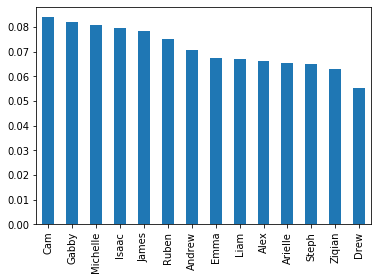

In [18]:
pr_2019_know.sort_values(ascending=False).plot.bar()

In [19]:
pr_2019_know_men = pr_2019_know[pr_2019_know.index.isin(men)==True]
pr_2019_know_men

Cam       0.083918
Andrew    0.070773
Isaac     0.079421
Liam      0.067028
James     0.078560
Drew      0.055391
Ruben     0.074960
dtype: float64

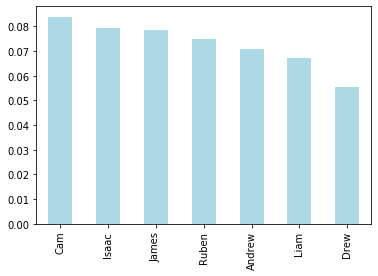

In [20]:
pr_2019_know_men_plot = pr_2019_know_men.sort_values(ascending=False).plot.bar(color="LightBlue")
pr_2019_know_men_plot

In [21]:
pr_2019_know_women = pr_2019_know[pr_2019_know.index.isin(women)==True]
pr_2019_know_women

Steph       0.065095
Emma        0.067481
Gabby       0.081902
Alex        0.066286
Arielle     0.065385
Ziqian      0.062867
Michelle    0.080933
dtype: float64

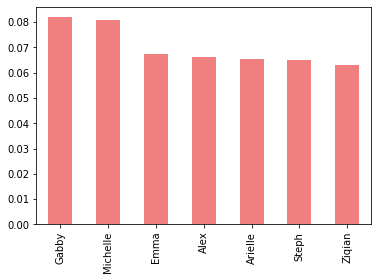

In [22]:
pr_2019_know_women_plot = pr_2019_know_women.sort_values(ascending=False).plot.bar(color="LightCoral")
pr_2019_know_women_plot

In [23]:
pr_2019_know_descending = []
pr_2019_know_men_values = []
pr_2019_know_women_values = []

for person in pr_2019_know.sort_values(ascending=False).index:
    pr_2019_know_descending += [person]
    if person in men:
        pr_2019_know_men_values += [pr_2019_know[person]]
        pr_2019_know_women_values += [0.0]
    elif person in women:
        pr_2019_know_women_values += [pr_2019_know[person]]
        pr_2019_know_men_values += [0.0]

In [24]:
pr_2019_know_men_values

[0.08391812450835229,
 0.0,
 0.0,
 0.07942090880378384,
 0.07855966161560493,
 0.07495975510247924,
 0.0707733996391781,
 0.0,
 0.06702773899484775,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05539056832952088]

In [25]:
pr_2019_know_women_values

[0.0,
 0.08190220063650033,
 0.08093321700499971,
 0.0,
 0.0,
 0.0,
 0.0,
 0.067481090184932,
 0.0,
 0.0662862856991137,
 0.06538529950106098,
 0.06509490902289915,
 0.06286684095672682,
 0.0]

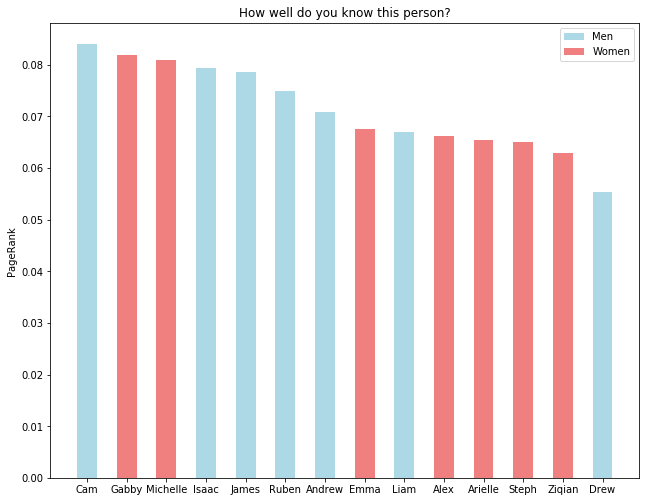

In [26]:
N = len(pr_2019_know_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, pr_2019_know_men_values, width, color="LightBlue")
p2 = ax.bar(ind, pr_2019_know_women_values, width, color="LightCoral")
ax.set_ylabel('PageRank')
ax.set_title('How well do you know this person?')
ax.set_xticks(ind)
ax.set_xticklabels(pr_2019_know_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How much do you like this person?

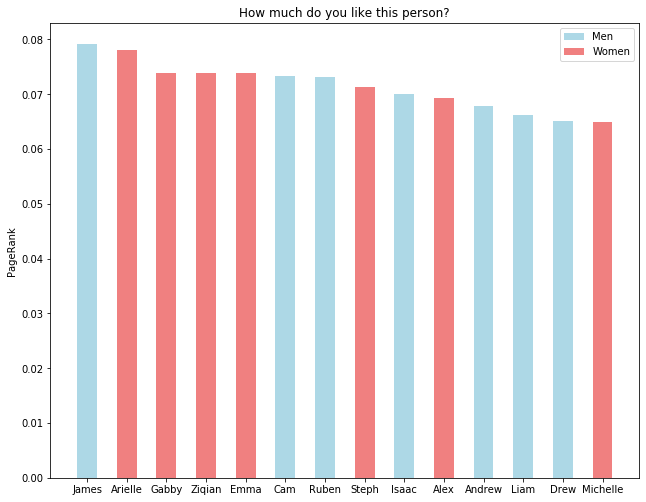

In [27]:
pr_2019_like_descending = []
pr_2019_like_men_values = []
pr_2019_like_women_values = []

for person in pr_2019_like.sort_values(ascending=False).index:
    pr_2019_like_descending += [person]
    if person in men:
        pr_2019_like_men_values += [pr_2019_like[person]]
        pr_2019_like_women_values += [0.0]
    elif person in women:
        pr_2019_like_women_values += [pr_2019_like[person]]
        pr_2019_like_men_values += [0.0]

N = len(pr_2019_like_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, pr_2019_like_men_values, width, color="LightBlue")
p2 = ax.bar(ind, pr_2019_like_women_values, width, color="LightCoral")
ax.set_ylabel('PageRank')
ax.set_title('How much do you like this person?')
ax.set_xticks(ind)
ax.set_xticklabels(pr_2019_like_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

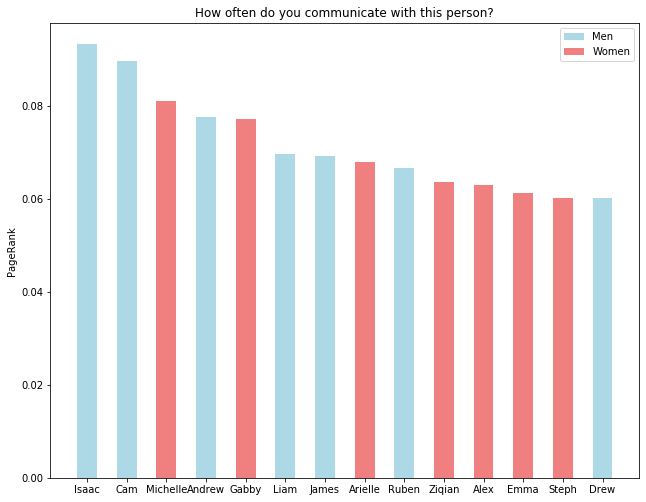

In [28]:
pr_2019_contact_descending = []
pr_2019_contact_men_values = []
pr_2019_contact_women_values = []

for person in pr_2019_contact.sort_values(ascending=False).index:
    pr_2019_contact_descending += [person]
    if person in men:
        pr_2019_contact_men_values += [pr_2019_contact[person]]
        pr_2019_contact_women_values += [0.0]
    elif person in women:
        pr_2019_contact_women_values += [pr_2019_contact[person]]
        pr_2019_contact_men_values += [0.0]

N = len(pr_2019_contact_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, pr_2019_contact_men_values, width, color="LightBlue")
p2 = ax.bar(ind, pr_2019_contact_women_values, width, color="LightCoral")
ax.set_ylabel('PageRank')
ax.set_title('How often do you communicate with this person?')
ax.set_xticks(ind)
ax.set_xticklabels(pr_2019_contact_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How much do you trust this person?

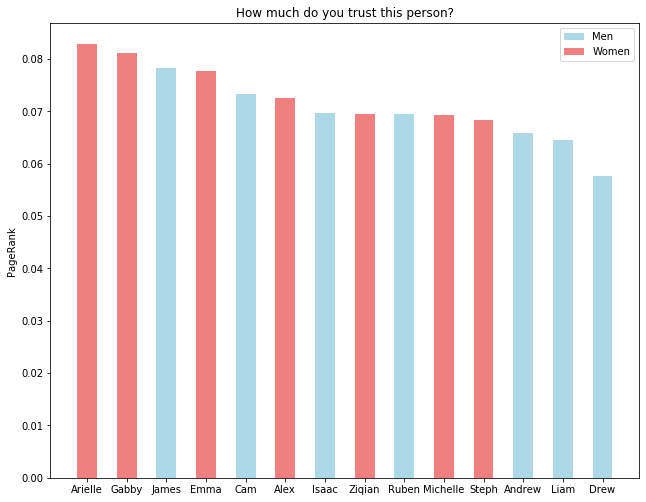

In [29]:
pr_2019_trust_descending = []
pr_2019_trust_men_values = []
pr_2019_trust_women_values = []

for person in pr_2019_trust.sort_values(ascending=False).index:
    pr_2019_trust_descending += [person]
    if person in men:
        pr_2019_trust_men_values += [pr_2019_trust[person]]
        pr_2019_trust_women_values += [0.0]
    elif person in women:
        pr_2019_trust_women_values += [pr_2019_trust[person]]
        pr_2019_trust_men_values += [0.0]

N = len(pr_2019_trust_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, pr_2019_trust_men_values, width, color="LightBlue")
p2 = ax.bar(ind, pr_2019_trust_women_values, width, color="LightCoral")
ax.set_ylabel('PageRank')
ax.set_title('How much do you trust this person?')
ax.set_xticks(ind)
ax.set_xticklabels(pr_2019_trust_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How likely are you to go to this person for advice or emotional support?

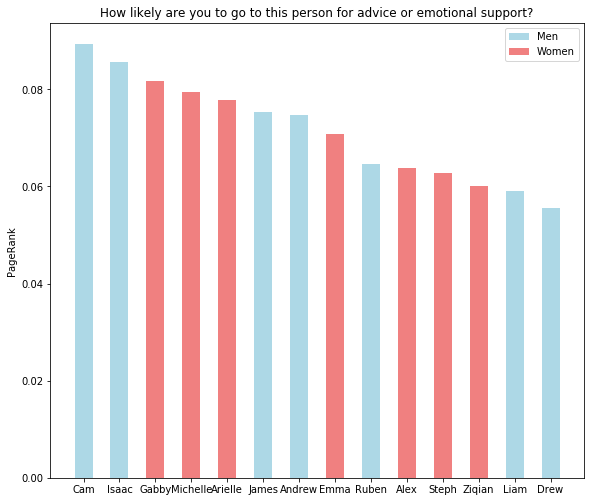

In [30]:
pr_2019_support_descending = []
pr_2019_support_men_values = []
pr_2019_support_women_values = []

for person in pr_2019_support.sort_values(ascending=False).index:
    pr_2019_support_descending += [person]
    if person in men:
        pr_2019_support_men_values += [pr_2019_support[person]]
        pr_2019_support_women_values += [0.0]
    elif person in women:
        pr_2019_support_women_values += [pr_2019_support[person]]
        pr_2019_support_men_values += [0.0]

N = len(pr_2019_support_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, pr_2019_support_men_values, width, color="LightBlue")
p2 = ax.bar(ind, pr_2019_support_women_values, width, color="LightCoral")
ax.set_ylabel('PageRank')
ax.set_title('How likely are you to go to this person for advice or emotional support?')
ax.set_xticks(ind)
ax.set_xticklabels(pr_2019_support_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

## PageRank: Correlation

In [31]:
pr_2019_all = pd.concat([pr_2019_know, pr_2019_contact, pr_2019_like, pr_2019_trust, pr_2019_support], axis=1, join='inner')
pr_2019_all.columns = ['know', 'contact', 'like', 'trust', 'support']
pr_2019_all

,know,contact,like,trust,support
Steph,0.065095,0.060128,0.071257,0.068365,0.062773
Emma,0.067481,0.061158,0.073821,0.077766,0.070759
Gabby,0.081902,0.077085,0.073919,0.081065,0.081616
Cam,0.083918,0.089632,0.073268,0.073342,0.089211
Andrew,0.070773,0.077667,0.067881,0.065918,0.074611
Isaac,0.079421,0.093197,0.070129,0.069706,0.085556
Alex,0.066286,0.062980,0.069278,0.072442,0.063781
Arielle,0.065385,0.067843,0.078114,0.082760,0.077744
Liam,0.067028,0.069732,0.066167,0.064482,0.059015
James,0.078560,0.069251,0.079092,0.078220,0.075365


In [32]:
corr = pr_2019_all.corr()
corr

,know,contact,like,trust,support
know,1.000000,0.792346,0.215415,0.426360,0.832616
contact,0.792346,1.000000,-0.091012,0.098479,0.839030
like,0.215415,-0.091012,1.000000,0.814860,0.315039
trust,0.426360,0.098479,0.814860,1.000000,0.558136
support,0.832616,0.839030,0.315039,0.558136,1.000000


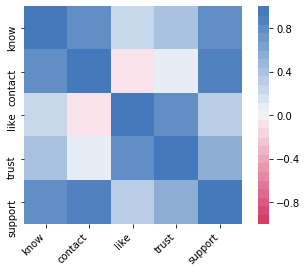

In [33]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

## Correlation Among Raw Data

### How well do you know this person?

In [34]:
data_2019_know_corr = data_2019_know.corr()
data_2019_know_corr

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,1.000000,-0.070071,0.184900,0.206725,0.129099,0.144841,0.311400,0.682048,0.539792,0.490990,0.885259,0.866025,0.912245,-0.316359
Emma,-0.070071,1.000000,-0.040522,-0.107211,0.213697,0.517306,-0.120605,0.322876,-0.130107,-0.188982,-0.134840,-0.288675,0.018291,0.269680
Gabby,0.184900,-0.040522,1.000000,0.572078,0.475191,0.000000,0.000000,0.568535,0.160128,0.080582,0.000000,-0.246183,0.150756,-0.171033
Cam,0.206725,-0.107211,0.572078,1.000000,0.330289,0.400064,0.018182,0.427810,0.452602,0.060634,0.447214,-0.068599,0.203655,-0.129099
Andrew,0.129099,0.213697,0.475191,0.330289,1.000000,0.872103,-0.328798,0.087408,0.704563,0.722806,0.103695,-0.262950,-0.069945,0.733359
Isaac,0.144841,0.517306,0.000000,0.400064,0.872103,1.000000,0.000000,0.163908,0.603023,0.507093,0.404520,-0.153897,0.000000,0.712069
Alex,0.311400,-0.120605,0.000000,0.018182,-0.328798,0.000000,1.000000,0.375379,-0.127273,-0.254000,0.454545,0.207390,0.147148,-0.298142
Arielle,0.682048,0.322876,0.568535,0.427810,0.087408,0.163908,0.375379,1.000000,0.083333,0.046097,0.568750,0.371159,0.626848,-0.222365
Liam,0.539792,-0.130107,0.160128,0.452602,0.704563,0.603023,-0.127273,0.083333,1.000000,0.850420,0.467099,0.300000,0.438904,0.624100
James,0.490990,-0.188982,0.080582,0.060634,0.722806,0.507093,-0.254000,0.046097,0.850420,1.000000,0.390335,0.397026,0.387419,0.597614


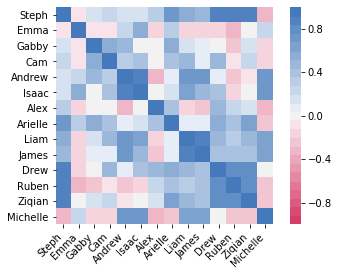

In [35]:
ax = sns.heatmap(
    data_2019_know_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How much do you like this person?

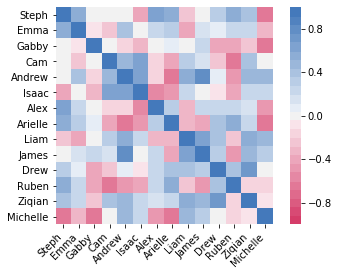

In [36]:
data_2019_like_corr = data_2019_like.corr()
data_2019_like_corr

ax = sns.heatmap(
    data_2019_like_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

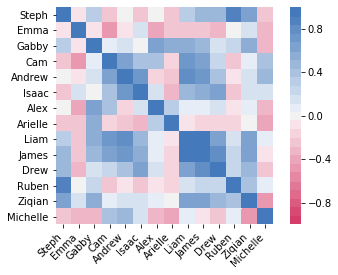

In [37]:
data_2019_contact_corr = data_2019_contact.corr()
data_2019_contact_corr

ax = sns.heatmap(
    data_2019_contact_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How much do you trust this person?

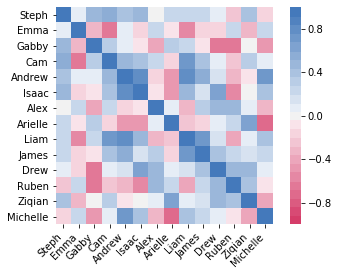

In [38]:
data_2019_trust_corr = data_2019_trust.corr()
data_2019_trust_corr

ax = sns.heatmap(
    data_2019_trust_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How likely are you to go to this person for advice or emotional support?

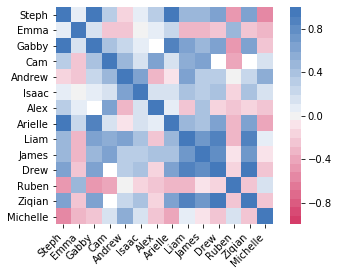

In [39]:
data_2019_support_corr = data_2019_support.corr()
data_2019_support_corr

ax = sns.heatmap(
    data_2019_support_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);